<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Base%20tesis%20bien%20Jenny%20semaforos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install linearmodels

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.7/1.7 MB 31.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 115.7/115.7 kB 9.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43.9/43.9 kB 3.4 MB/s eta 0:00:00


In [ ]:
!pip install pandas openpyxl linearmodels


In [ ]:
import pandas as pd

# Cargar el archivo Excel
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")

# Renombrar columnas
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']

# Eliminar filas con encabezados repetidos
df = df[df['PERIODO'] != 'PERIODO']

# Convertir columnas a valores num√©ricos
df['PERIODO'] = pd.to_numeric(df['PERIODO'])
df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)


In [ ]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Establecer √≠ndice de panel con 'UNIONES' y 'PERIODO'
df_panel = df.set_index(['UNIONES', 'PERIODO'])

# Definir la variable dependiente y las independientes
Y = df_panel['RATIO_LIQUIDEZ']
X = df_panel[['IMOR', 'ICOR', 'ROE', 'ROA']]
X = sm.add_constant(X)

# Crear y ajustar el modelo de efectos fijos
model = PanelOLS(Y, X, entity_effects=True)
results = model.fit()

# Calcular el error est√°ndar de la regresi√≥n (RMSE)
residuals = results.resids
n = residuals.shape[0]  # n√∫mero total de observaciones
k = X.shape[1]  # n√∫mero de variables (incluyendo constante)
rmse = np.sqrt((residuals ** 2).sum() / (n - k))

# Mostrar el resumen y el RMSE
print(results.summary)
print(f"\nError est√°ndar de la regresi√≥n (RMSE): {rmse:.4f}")

# Obtener e imprimir los intervalos de confianza al 95 %
conf_int = results.conf_int()
print("\nIntervalos de confianza del 95 % para los coeficientes:")
print(conf_int)

                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Sat, Jun 07 2025   R-squared (Overall):              0.1086
Time:                        18:09:04   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:                       82.000                                           
Max Obs:                       82.000   F-statistic (robust):             23.110
                            

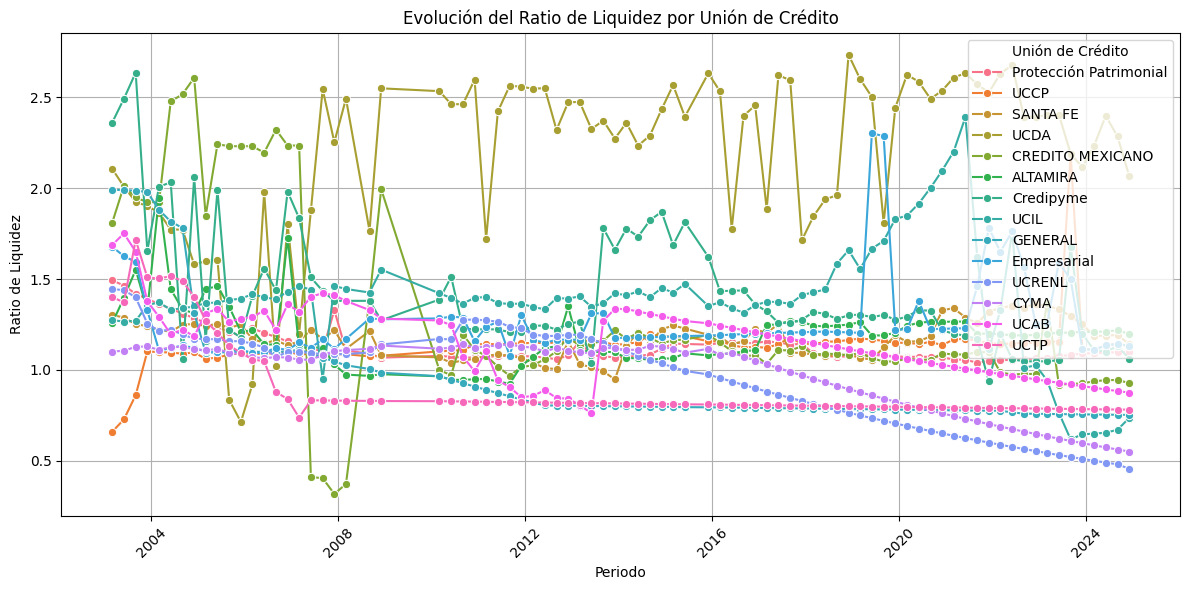

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']

# Convertir tipos de datos
df['PERIODO'] = pd.to_datetime(df['PERIODO'].astype(str), format='%Y%m')
df[['RATIO_LIQUIDEZ']] = df[['RATIO_LIQUIDEZ']].apply(pd.to_numeric)

# Crear gr√°fica
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='PERIODO', y='RATIO_LIQUIDEZ', hue='UNIONES', marker='o')

plt.title('Evoluci√≥n del Ratio de Liquidez por Uni√≥n de Cr√©dito')
plt.xlabel('Periodo')
plt.ylabel('Ratio de Liquidez')
plt.xticks(rotation=45)
plt.legend(title='Uni√≥n de Cr√©dito')
plt.grid(True)
plt.tight_layout()
plt.show()


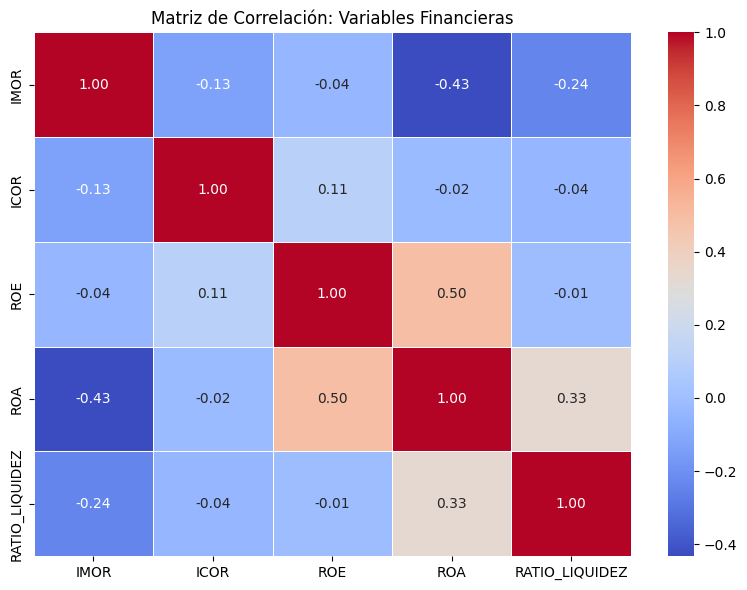

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']

# Convertir columnas relevantes a num√©ricas
variables = ['IMOR', 'ICOR', 'ROE', 'ROA', 'RATIO_LIQUIDEZ']
df[variables] = df[variables].apply(pd.to_numeric)

# Calcular matriz de correlaci√≥n
correlation_matrix = df[variables].corr()

# Crear matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title('Matriz de Correlaci√≥n: Variables Financieras')
plt.tight_layout()
plt.show()


Coeficientes del modelo:
const    1.385403
IMOR    -0.002821
ICOR    -0.001994
ROE     -0.002660
ROA      0.017689
Name: parameter, dtype: float64
Resultados del summary: 
                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Sat, Jun 07 2025   R-squared (Overall):              0.1086
Time:                        18:09:25   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:          

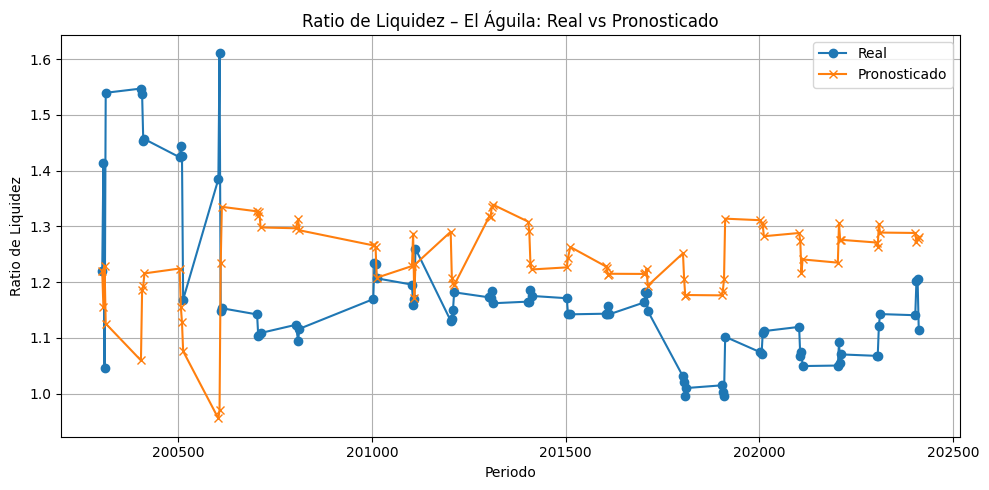


Archivo exportado como 'Pronostico_El_Aguila.xlsx'


In [ ]:
# Instalaci√≥n de librer√≠as necesarias
!pip install linearmodels
!pip install pandas openpyxl

import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ----------------------------
# 1. Ajustar modelo con PANEL BIEN
# ----------------------------

# Cargar y limpiar la base PANEL BIEN
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']
df['PERIODO'] = pd.to_numeric(df['PERIODO'])
df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

# Preparar datos de panel
df_panel = df.set_index(['UNIONES', 'PERIODO'])
Y = df_panel['RATIO_LIQUIDEZ']
X = sm.add_constant(df_panel[['IMOR', 'ICOR', 'ROE', 'ROA']])
modelo = PanelOLS(Y, X, entity_effects=True)
resultados = modelo.fit()

# Obtener coeficientes
coeficientes = resultados.params
print("Coeficientes del modelo:")
print(coeficientes)

print("Resultados del summary: ")
print(resultados.summary)

# ----------------------------
# 2. Pron√≥stico de El √Åguila
# ----------------------------

# Leer archivo de El √Åguila
df_aguila = pd.read_excel("El √Åguila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

# Preparar X con constante
X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])

# Pronosticar sin efecto fijo (ya que solo se usaron coeficientes)
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)

# Calcular error
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

# Calcular RMSE
rmse_aguila = np.sqrt((df_aguila['ERROR'] ** 2).mean())
print(f"\nRMSE del pron√≥stico de El √Åguila (sin efecto fijo): {rmse_aguila:.4f}")

# Calcular MAE (Error Promedio Absoluto)
mae_aguila = np.mean(np.abs(df_aguila['ERROR']))
print(f"MAE (Error Promedio Absoluto): {mae_aguila:.4f}")


# Mostrar tabla de comparaci√≥n
print("\nComparaci√≥n real vs. pron√≥stico:")
print(df_aguila[['PERIODO', 'RATIO_LIQUIDEZ', 'PRONOSTICO', 'ERROR']])

# ----------------------------
# 3. Graficar resultado
# ----------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_aguila['PERIODO'], df_aguila['RATIO_LIQUIDEZ'], marker='o', label='Real')
plt.plot(df_aguila['PERIODO'], df_aguila['PRONOSTICO'], marker='x', label='Pronosticado')
plt.title('Ratio de Liquidez ‚Äì El √Åguila: Real vs Pronosticado')
plt.xlabel('Periodo')
plt.ylabel('Ratio de Liquidez')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Exportar a Excel
# ----------------------------
df_aguila.to_excel("Pronostico_El_Aguila.xlsx", index=False)
print("\nArchivo exportado como 'Pronostico_El_Aguila.xlsx'")


In [ ]:
# Calcular RMSE
rmse_aguila = np.sqrt((df_aguila['ERROR'] ** 2).mean())
print(f"\nRMSE del pron√≥stico de El √Åguila (sin efecto fijo): {rmse_aguila:.4f}")

# Calcular MAE (Error Promedio Absoluto)
mae_aguila = np.mean(np.abs(df_aguila['ERROR']))
print(f"MAE (Error Promedio Absoluto): {mae_aguila:.4f}")



RMSE del pron√≥stico de El √Åguila (sin efecto fijo): 0.1948
MAE (Error Promedio Absoluto): 0.1615


In [ ]:
def forecast_panel(X_nuevo, coeficientes):
    return X_nuevo.dot(coeficientes)


In [ ]:
df_aguila['PRONOSTICO'] = forecast_panel(X_aguila, coeficientes)


Coeficientes del modelo:
const    1.385403
IMOR    -0.002821
ICOR    -0.001994
ROE     -0.002660
ROA      0.017689
Name: parameter, dtype: float64
Resultados del summary: 
                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Sat, Jun 07 2025   R-squared (Overall):              0.1086
Time:                        18:09:49   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:          

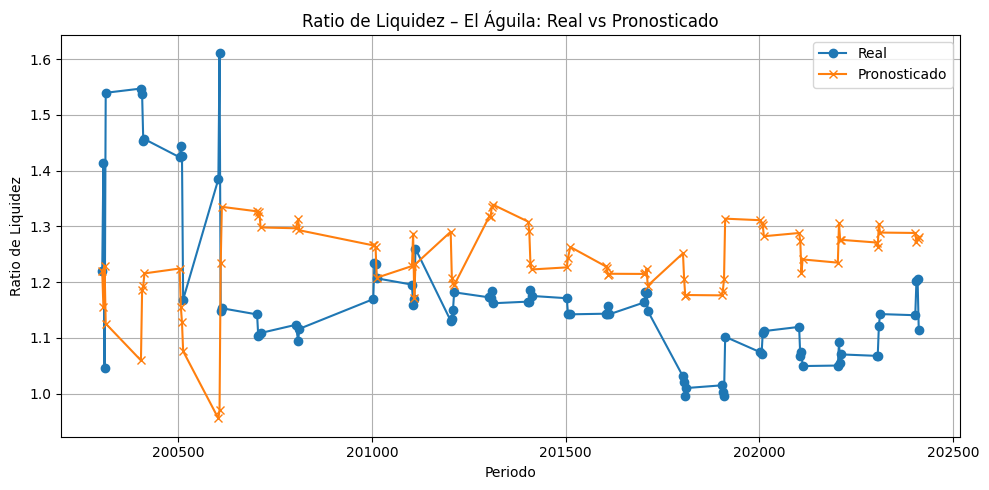


Archivo exportado como 'Pronostico_El_Aguila.xlsx'


In [ ]:
# Instalaci√≥n de librer√≠as necesarias
!pip install linearmodels
!pip install pandas openpyxl

import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ----------------------------
# 1. Ajustar modelo con PANEL BIEN
# ----------------------------

# Cargar y limpiar la base PANEL BIEN
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']
df['PERIODO'] = pd.to_numeric(df['PERIODO'])
df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

# Preparar datos de panel
df_panel = df.set_index(['UNIONES', 'PERIODO'])
Y = df_panel['RATIO_LIQUIDEZ']
X = sm.add_constant(df_panel[['IMOR', 'ICOR', 'ROE', 'ROA']])
modelo = PanelOLS(Y, X, entity_effects=True)
resultados = modelo.fit()

# Obtener coeficientes
coeficientes = resultados.params
print("Coeficientes del modelo:")
print(coeficientes)

print("Resultados del summary: ")
print(resultados.summary)

# ----------------------------
# 2. Funci√≥n forecast
# ----------------------------

def forecast_panel(X_nuevo, coeficientes):
    """
    Realiza el pron√≥stico de RATIO_LIQUIDEZ utilizando los coeficientes del modelo.
    """
    return X_nuevo.dot(coeficientes)

# ----------------------------
# 3. Pron√≥stico de El √Åguila
# ----------------------------

# Leer archivo de El √Åguila
df_aguila = pd.read_excel("El √Åguila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

# Preparar X con constante
X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])

# Usar la funci√≥n forecast
df_aguila['PRONOSTICO'] = forecast_panel(X_aguila, coeficientes)

# Calcular error
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

# Calcular m√©tricas de error
rmse_aguila = np.sqrt((df_aguila['ERROR'] ** 2).mean())
mae_aguila = np.mean(np.abs(df_aguila['ERROR']))

print(f"\nRMSE del pron√≥stico de El √Åguila (sin efecto fijo): {rmse_aguila:.4f}")
print(f"MAE (Error Promedio Absoluto): {mae_aguila:.4f}")

# Mostrar tabla de comparaci√≥n
print("\nComparaci√≥n real vs. pron√≥stico:")
print(df_aguila[['PERIODO', 'RATIO_LIQUIDEZ', 'PRONOSTICO', 'ERROR']])

# ----------------------------
# 4. Graficar resultado
# ----------------------------

plt.figure(figsize=(10, 5))
plt.plot(df_aguila['PERIODO'], df_aguila['RATIO_LIQUIDEZ'], marker='o', label='Real')
plt.plot(df_aguila['PERIODO'], df_aguila['PRONOSTICO'], marker='x', label='Pronosticado')
plt.title('Ratio de Liquidez ‚Äì El √Åguila: Real vs Pronosticado')
plt.xlabel('Periodo')
plt.ylabel('Ratio de Liquidez')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# 5. Exportar a Excel
# ----------------------------

df_aguila.to_excel("Pronostico_El_Aguila.xlsx", index=False)
print("\nArchivo exportado como 'Pronostico_El_Aguila.xlsx'")


In [ ]:
import pandas as pd

# Cargar archivo
archivo = "PANEL BIEN.xlsx"
df = pd.read_excel(archivo, sheet_name="Hoja1")

# Limpiar y renombrar columnas
df.columns = df.iloc[0]
df = df[1:]
df.columns.name = None
df = df.rename(columns={"Uni√≥n de Credito": "INDICADOR"})

# Convertir columnas num√©ricas
numeric_cols = ["RATIO DE LIQUIDEZ", "IMOR", "ICOR", "ROA", "ROE"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calcular cuartiles por indicador
cuartiles = df[numeric_cols].quantile([0.25, 0.5, 0.75]).round(2)

# Mostrar los cuartiles
print("üìä Cuartiles por indicador:")
print(cuartiles)

# Clasificador de sem√°foro general
def clasificar(valor, q1, q3):
    if valor < q1:
        return "üî¥ Bajo"
    elif valor > q3:
        return "üü¢ Alto"
    else:
        return "üü° Medio"

# Calcular promedios por Uni√≥n
promedios = df.groupby("INDICADOR")[numeric_cols].mean().round(2)

# Evaluar cada indicador con cuartiles personalizados
print("\nüìà Evaluaci√≥n por Uni√≥n de Cr√©dito con Sem√°foro:")
for nombre, fila in promedios.iterrows():
    print(f"\nüîπ Uni√≥n de Cr√©dito: {nombre}")
    for col in numeric_cols:
        estado = clasificar(fila[col], cuartiles.loc[0.25, col], cuartiles.loc[0.75, col])
        print(f"{col}: {fila[col]} ‚Üí {estado}")


üìä Cuartiles por indicador:
      RATIO DE LIQUIDEZ   IMOR   ICOR   ROA    ROE
0.25               1.04   1.63  28.45 -0.80  -1.56
0.50               1.14   4.65  55.73  0.77   5.61
0.75               1.30  15.07  80.18  1.94  11.04

üìà Evaluaci√≥n por Uni√≥n de Cr√©dito con Sem√°foro:

üîπ Uni√≥n de Cr√©dito: ALTAMIRA
RATIO DE LIQUIDEZ: 1.19 ‚Üí üü° Medio
IMOR: 26.73 ‚Üí üü¢ Alto
ICOR: 19.18 ‚Üí üî¥ Bajo
ROA: 0.96 ‚Üí üü° Medio
ROE: 5.3 ‚Üí üü° Medio

üîπ Uni√≥n de Cr√©dito: CREDITO MEXICANO
RATIO DE LIQUIDEZ: 1.28 ‚Üí üü° Medio
IMOR: 15.05 ‚Üí üü° Medio
ICOR: 26.96 ‚Üí üî¥ Bajo
ROA: -0.09 ‚Üí üü° Medio
ROE: 1.84 ‚Üí üü° Medio

üîπ Uni√≥n de Cr√©dito: CYMA
RATIO DE LIQUIDEZ: 0.97 ‚Üí üî¥ Bajo
IMOR: 6.18 ‚Üí üü° Medio
ICOR: 64.58 ‚Üí üü° Medio
ROA: -0.04 ‚Üí üü° Medio
ROE: -0.27 ‚Üí üü° Medio

üîπ Uni√≥n de Cr√©dito: Credipyme
RATIO DE LIQUIDEZ: 1.42 ‚Üí üü¢ Alto
IMOR: 17.18 ‚Üí üü¢ Alto
ICOR: 49.37 ‚Üí üü° Medio
ROA: -1.65 ‚Üí üî¥ Bajo
ROE: -2.99 ‚Üí üî¥ Baj

In [ ]:
import pandas as pd

# Cargar archivo
archivo = "PANEL BIEN.xlsx"
df = pd.read_excel(archivo, sheet_name="Hoja1")

# Limpiar y renombrar columnas
df.columns = df.iloc[0]
df = df[1:]
df.columns.name = None
df = df.rename(columns={"Uni√≥n de Credito": "INDICADOR"})

# Convertir columnas num√©ricas
numeric_cols = ["RATIO DE LIQUIDEZ", "IMOR", "ICOR", "ROA", "ROE"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calcular cuartiles por indicador
cuartiles = df[numeric_cols].quantile([0.25, 0.5, 0.75]).round(2)

# Mostrar cuartiles
print("üìä Cuartiles por indicador:")
print(cuartiles)

# Indicadores donde un valor m√°s alto es peor (riesgo)
indicadores_invertidos = ["IMOR", "ICOR"]

# Clasificador ajustado por tipo de indicador
def clasificar(valor, q1, q3, invertido=False):
    if invertido:
        if valor > q3:
            return "üî¥ Alto"
        elif valor < q1:
            return "üü¢ Bajo"
        else:
            return "üü° Medio"
    else:
        if valor < q1:
            return "üî¥ Bajo"
        elif valor > q3:
            return "üü¢ Alto"
        else:
            return "üü° Medio"

# Calcular promedios por Uni√≥n
promedios = df.groupby("INDICADOR")[numeric_cols].mean().round(2)

# Evaluar cada indicador con sem√°foro
print("\nüìà Evaluaci√≥n por Uni√≥n de Cr√©dito con Sem√°foro:")
for nombre, fila in promedios.iterrows():
    print(f"\nüîπ Uni√≥n de Cr√©dito: {nombre}")
    for col in numeric_cols:
        invertido = col in indicadores_invertidos
        estado = clasificar(fila[col], cuartiles.loc[0.25, col], cuartiles.loc[0.75, col], invertido)
        print(f"{col}: {fila[col]} ‚Üí {estado}")


üìä Cuartiles por indicador:
      RATIO DE LIQUIDEZ   IMOR   ICOR   ROA    ROE
0.25               1.04   1.63  28.45 -0.80  -1.56
0.50               1.14   4.65  55.73  0.77   5.61
0.75               1.30  15.07  80.18  1.94  11.04

üìà Evaluaci√≥n por Uni√≥n de Cr√©dito con Sem√°foro:

üîπ Uni√≥n de Cr√©dito: ALTAMIRA
RATIO DE LIQUIDEZ: 1.19 ‚Üí üü° Medio
IMOR: 26.73 ‚Üí üî¥ Alto
ICOR: 19.18 ‚Üí üü¢ Bajo
ROA: 0.96 ‚Üí üü° Medio
ROE: 5.3 ‚Üí üü° Medio

üîπ Uni√≥n de Cr√©dito: CREDITO MEXICANO
RATIO DE LIQUIDEZ: 1.28 ‚Üí üü° Medio
IMOR: 15.05 ‚Üí üü° Medio
ICOR: 26.96 ‚Üí üü¢ Bajo
ROA: -0.09 ‚Üí üü° Medio
ROE: 1.84 ‚Üí üü° Medio

üîπ Uni√≥n de Cr√©dito: CYMA
RATIO DE LIQUIDEZ: 0.97 ‚Üí üî¥ Bajo
IMOR: 6.18 ‚Üí üü° Medio
ICOR: 64.58 ‚Üí üü° Medio
ROA: -0.04 ‚Üí üü° Medio
ROE: -0.27 ‚Üí üü° Medio

üîπ Uni√≥n de Cr√©dito: Credipyme
RATIO DE LIQUIDEZ: 1.42 ‚Üí üü¢ Alto
IMOR: 17.18 ‚Üí üî¥ Alto
ICOR: 49.37 ‚Üí üü° Medio
ROA: -1.65 ‚Üí üî¥ Bajo
ROE: -2.99 ‚Üí üî¥ Baj

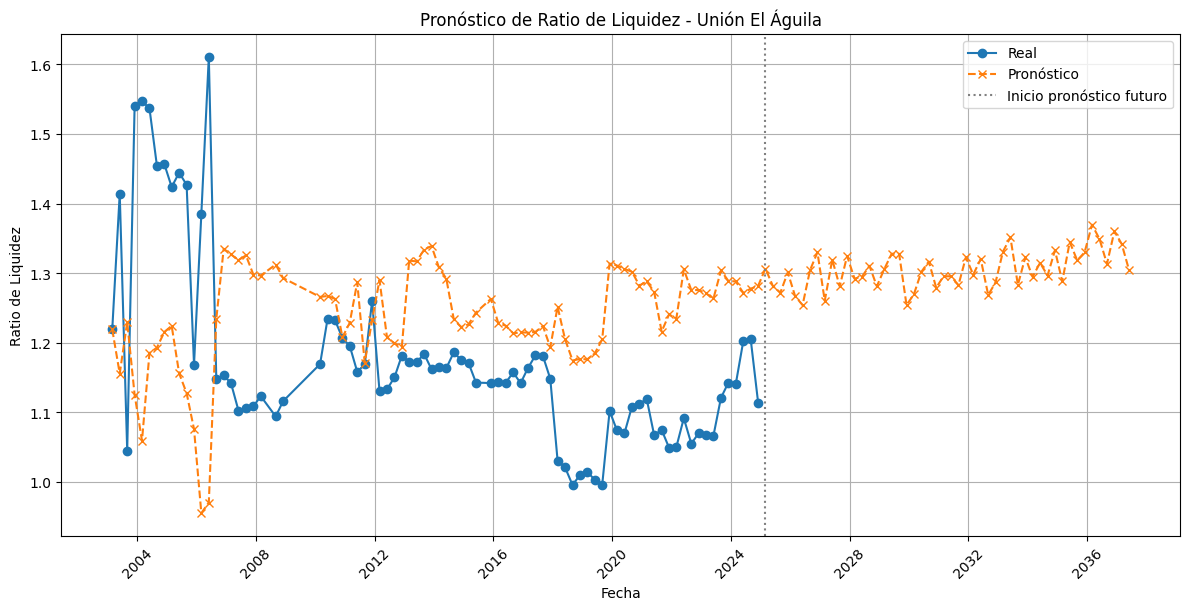


=== ERRORES DEL PRON√ìSTICO (datos reales de El √Åguila) ===
MAE  (Error Absoluto Medio): 0.1615
MSE  (Error Cuadr√°tico Medio): 0.0379
RMSE (Ra√≠z del Error Cuadr√°tico Medio): 0.1948


In [ ]:
#  Leer archivo de El √Åguila y pronosticar valores actuales
# -------------------------------------
df_aguila = pd.read_excel("El √Åguila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['Uni√≥n de Credito', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

#----------------------------
# Generar 50 periodos adicionales con m√°s realismo
# ----------------------------
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

# Traducir PERIODO a fechas trimestrales
def periodo_to_fecha(periodo):
    a√±o = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    return pd.Timestamp(f"{a√±o}-{mes:02d}-01")

def avanzar_trimestre(periodo):
    a√±o = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    mes += 3
    if mes > 12:
        mes -= 12
        a√±o += 1
    return a√±o * 100 + mes

ultimo_periodo = int(df_aguila['PERIODO'].max())
nuevos_periodos = [avanzar_trimestre(ultimo_periodo)]
for _ in range(49):
    nuevos_periodos.append(avanzar_trimestre(nuevos_periodos[-1]))

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'wwwwwwwwwwwwwwwwwwwwwwwwwwwww': 'EL √ÅGUILA', 'PERIODO': p}

    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(i + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)
        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido

    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# ----------------------------
# Unir, convertir a fechas y exportar resultados
# ----------------------------
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')
df_aguila_extendido['PERIODO_FECHA'] = df_aguila_extendido['PERIODO'].apply(periodo_to_fecha)

# Exportar a Excel
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# ----------------------------
# Graficar con fechas reales
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['PRONOSTICO'], label='Pron√≥stico', linestyle='--', marker='x')
fecha_inicio_futuro = periodo_to_fecha(avanzar_trimestre(ultimo_periodo))
plt.axvline(fecha_inicio_futuro, color='gray', linestyle=':', label='Inicio pron√≥stico futuro')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Liquidez')
plt.title('Pron√≥stico de Ratio de Liquidez - Uni√≥n El √Åguila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# Evaluaci√≥n del modelo
# ----------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error

real = df_aguila['RATIO_LIQUIDEZ']
pred = df_aguila['PRONOSTICO']
mse = mean_squared_error(real, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real, pred)

print("\n=== ERRORES DEL PRON√ìSTICO (datos reales de El √Åguila) ===")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"MSE  (Error Cuadr√°tico Medio): {mse:.4f}")
print(f"RMSE (Ra√≠z del Error Cuadr√°tico Medio): {rmse:.4f}")


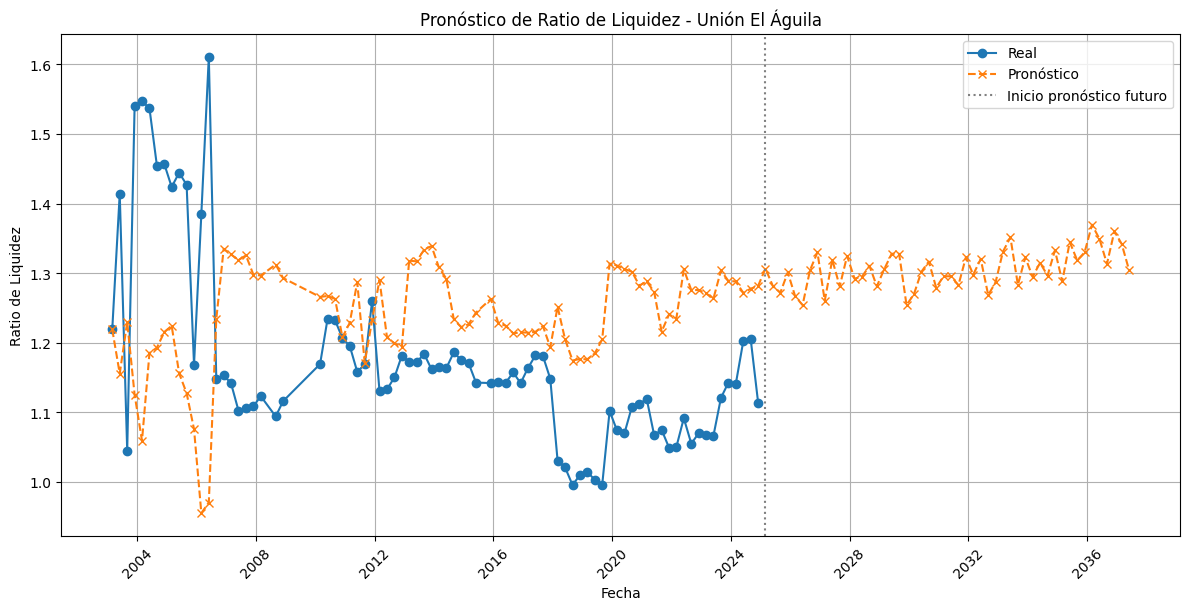


=== ERRORES DEL PRON√ìSTICO (datos reales de El √Åguila) ===


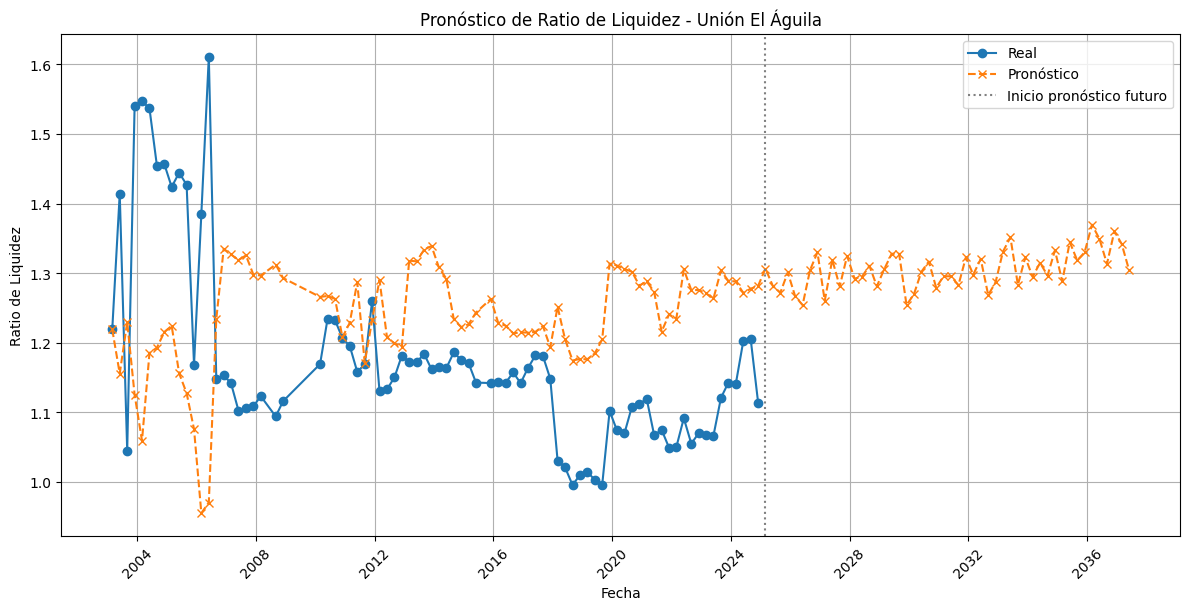


=== ERRORES DEL PRON√ìSTICO (datos reales de El √Åguila) ===
MAE  (Error Absoluto Medio): 0.1615
MSE  (Error Cuadr√°tico Medio): 0.0379
RMSE (Ra√≠z del Error Cuadr√°tico Medio): 0.1948


In [ ]:
#  Leer archivo de El √Åguila y pronosticar valores actuales
# -------------------------------------
df_aguila = pd.read_excel("El √Åguila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['Uni√≥n de Credito', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

#----------------------------
# Generar 50 periodos adicionales con m√°s realismo
# ----------------------------
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

# Traducir PERIODO a fechas trimestrales
def periodo_to_fecha(periodo):
    a√±o = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    return pd.Timestamp(f"{a√±o}-{mes:02d}-01")

def avanzar_trimestre(periodo):
    a√±o = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    mes += 3
    if mes > 12:
        mes -= 12
        a√±o += 1
    return a√±o * 100 + mes

ultimo_periodo = int(df_aguila['PERIODO'].max())
nuevos_periodos = [avanzar_trimestre(ultimo_periodo)]
for _ in range(49):
    nuevos_periodos.append(avanzar_trimestre(nuevos_periodos[-1]))

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'wwwwwwwwwwwwwwwwwwwwwwwwwwwww': 'EL √ÅGUILA', 'PERIODO': p}

    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(i + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)
        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido

    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# ----------------------------
# Unir, convertir a fechas y exportar resultados
# ----------------------------
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')
df_aguila_extendido['PERIODO_FECHA'] = df_aguila_extendido['PERIODO'].apply(periodo_to_fecha)

# Exportar a Excel
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# ----------------------------
# Graficar con fechas reales
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['PRONOSTICO'], label='Pron√≥stico', linestyle='--', marker='x')
fecha_inicio_futuro = periodo_to_fecha(avanzar_trimestre(ultimo_periodo))
plt.axvline(fecha_inicio_futuro, color='gray', linestyle=':', label='Inicio pron√≥stico futuro')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Liquidez')
plt.title('Pron√≥stico de Ratio de Liquidez - Uni√≥n El √Åguila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# Evaluaci√≥n del modelo
# ----------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error

real = df_aguila['RATIO_LIQUIDEZ']
pred = df_aguila['PRONOSTICO']
mse = mean_squared_error(real, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real, pred)

print("\n=== ERRORES DEL PRON√ìSTICO (datos reales de El √Åguila) ===")
#  Leer archivo de El √Åguila y pronosticar valores actuales
# -------------------------------------
df_aguila = pd.read_excel("El √Åguila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['Uni√≥n de Credito', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

#----------------------------
# Generar 50 periodos adicionales con m√°s realismo
# ----------------------------
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

# Traducir PERIODO a fechas trimestrales
def periodo_to_fecha(periodo):
    a√±o = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    return pd.Timestamp(f"{a√±o}-{mes:02d}-01")

def avanzar_trimestre(periodo):
    a√±o = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    mes += 3
    if mes > 12:
        mes -= 12
        a√±o += 1
    return a√±o * 100 + mes

ultimo_periodo = int(df_aguila['PERIODO'].max())
nuevos_periodos = [avanzar_trimestre(ultimo_periodo)]
for _ in range(49):
    nuevos_periodos.append(avanzar_trimestre(nuevos_periodos[-1]))

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'Uni√≥n de Credito': 'EL √ÅGUILA', 'PERIODO': p}

    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(i + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)
        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido

    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# ----------------------------
# Unir, convertir a fechas y exportar resultados
# ----------------------------
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')
df_aguila_extendido['PERIODO_FECHA'] = df_aguila_extendido['PERIODO'].apply(periodo_to_fecha)

# Exportar a Excel
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# ----------------------------
# Graficar con fechas reales
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['PRONOSTICO'], label='Pron√≥stico', linestyle='--', marker='x')
fecha_inicio_futuro = periodo_to_fecha(avanzar_trimestre(ultimo_periodo))
plt.axvline(fecha_inicio_futuro, color='gray', linestyle=':', label='Inicio pron√≥stico futuro')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Liquidez')
plt.title('Pron√≥stico de Ratio de Liquidez - Uni√≥n El √Åguila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# Evaluaci√≥n del modelo
# ----------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error

real = df_aguila['RATIO_LIQUIDEZ']
pred = df_aguila['PRONOSTICO']
mse = mean_squared_error(real, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real, pred)

print("\n=== ERRORES DEL PRON√ìSTICO (datos reales de El √Åguila) ===")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"MSE  (Error Cuadr√°tico Medio): {mse:.4f}")
print(f"RMSE (Ra√≠z del Error Cuadr√°tico Medio): {rmse:.4f}")

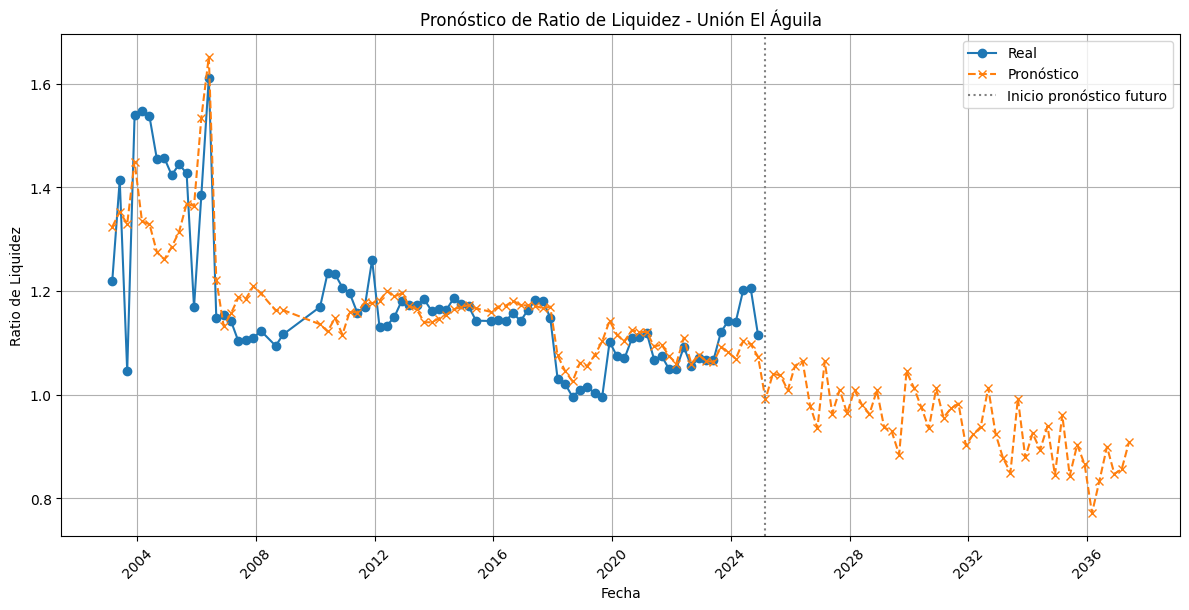


=== ERRORES DEL PRON√ìSTICO (datos reales de El √Åguila) ===
MAE  (Error Absoluto Medio): 0.0562
MSE  (Error Cuadr√°tico Medio): 0.0064
RMSE (Ra√≠z del Error Cuadr√°tico Medio): 0.0800

üìà Clasificaci√≥n tipo sem√°foro basada en promedios de pron√≥stico futuro

üîπ Uni√≥n de Cr√©dito: EL √ÅGUILA (promedio de pron√≥stico futuro)
RATIO DE LIQUIDEZ: 0.95 ‚Üí üî¥ Alto
IMOR: 13.56 ‚Üí üü° Medio
ICOR: 66.51 ‚Üí üü° Medio
ROA: 8.18 ‚Üí üü¢ Bajo
ROE: 20.11 ‚Üí üü¢ Bajo


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Leer archivo de El √Åguila y pronosticar valores actuales
# -------------------------------------
df_aguila = pd.read_excel("El √Åguila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['Uni√≥n de Credito', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
modelo = sm.OLS(df_aguila['RATIO_LIQUIDEZ'], X_aguila).fit()
coeficientes = modelo.params
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

# Generar 50 periodos adicionales con m√°s realismo
# ----------------------------
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

def periodo_to_fecha(periodo):
    a√±o = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    return pd.Timestamp(f"{a√±o}-{mes:02d}-01")

def avanzar_trimestre(periodo):
    a√±o = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    mes += 3
    if mes > 12:
        mes -= 12
        a√±o += 1
    return a√±o * 100 + mes

ultimo_periodo = int(df_aguila['PERIODO'].max())
nuevos_periodos = [avanzar_trimestre(ultimo_periodo)]
for _ in range(49):
    nuevos_periodos.append(avanzar_trimestre(nuevos_periodos[-1]))

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'Uni√≥n de Credito': 'EL √ÅGUILA', 'PERIODO': p}
    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(i + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)
        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido
    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# Unir, convertir a fechas y exportar resultados
# ----------------------------
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')
df_aguila_extendido['PERIODO_FECHA'] = df_aguila_extendido['PERIODO'].apply(periodo_to_fecha)
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# Graficar con fechas reales
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['PRONOSTICO'], label='Pron√≥stico', linestyle='--', marker='x')
fecha_inicio_futuro = periodo_to_fecha(avanzar_trimestre(ultimo_periodo))
plt.axvline(fecha_inicio_futuro, color='gray', linestyle=':', label='Inicio pron√≥stico futuro')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Liquidez')
plt.title('Pron√≥stico de Ratio de Liquidez - Uni√≥n El √Åguila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Evaluaci√≥n del modelo
real = df_aguila['RATIO_LIQUIDEZ']
pred = df_aguila['PRONOSTICO']
mse = mean_squared_error(real, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real, pred)

print("\n=== ERRORES DEL PRON√ìSTICO (datos reales de El √Åguila) ===")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"MSE  (Error Cuadr√°tico Medio): {mse:.4f}")
print(f"RMSE (Ra√≠z del Error Cuadr√°tico Medio): {rmse:.4f}")

# Clasificaci√≥n tipo sem√°foro usando promedios de pron√≥stico futuro
print("\nüìà Clasificaci√≥n tipo sem√°foro basada en promedios de pron√≥stico futuro")

# Cargar archivo de panel para cuartiles
df_panel = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df_panel.columns = df_panel.iloc[0]
df_panel = df_panel[1:]
df_panel.columns.name = None
df_panel = df_panel.rename(columns={"Uni√≥n de Credito": "INDICADOR"})

numeric_cols = ["RATIO DE LIQUIDEZ", "IMOR", "ICOR", "ROA", "ROE"]
for col in numeric_cols:
    df_panel[col] = pd.to_numeric(df_panel[col], errors='coerce')

cuartiles = df_panel[numeric_cols].quantile([0.25, 0.5, 0.75]).round(2)
indicadores_invertidos = ["IMOR", "ICOR"]

def clasificar(valor, q1, q3, invertido=False):
    if invertido:
        if valor > q3:
            return "üî¥ Alto"
        elif valor < q1:
            return "üü¢ Bajo"
        else:
            return "üü° Medio"
    else:
        if valor < q1:
            return "üî¥ Alto"
        elif valor > q3:
            return "üü¢ Bajo"
        else:
            return "üü° Medio"

# Calcular promedio de los pr√≥ximos 50 trimestres
promedios_futuros = df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA', 'PRONOSTICO']].mean().round(2)
promedios_futuros.rename({'PRONOSTICO': 'RATIO DE LIQUIDEZ'}, inplace=True)

print("\nüîπ Uni√≥n de Cr√©dito: EL √ÅGUILA (promedio de pron√≥stico futuro)")
for col in numeric_cols:
    valor = promedios_futuros[col]
    invertido = col in indicadores_invertidos
    estado = clasificar(valor, cuartiles.loc[0.25, col], cuartiles.loc[0.75, col], invertido)
    print(f"{col}: {valor} ‚Üí {estado}")


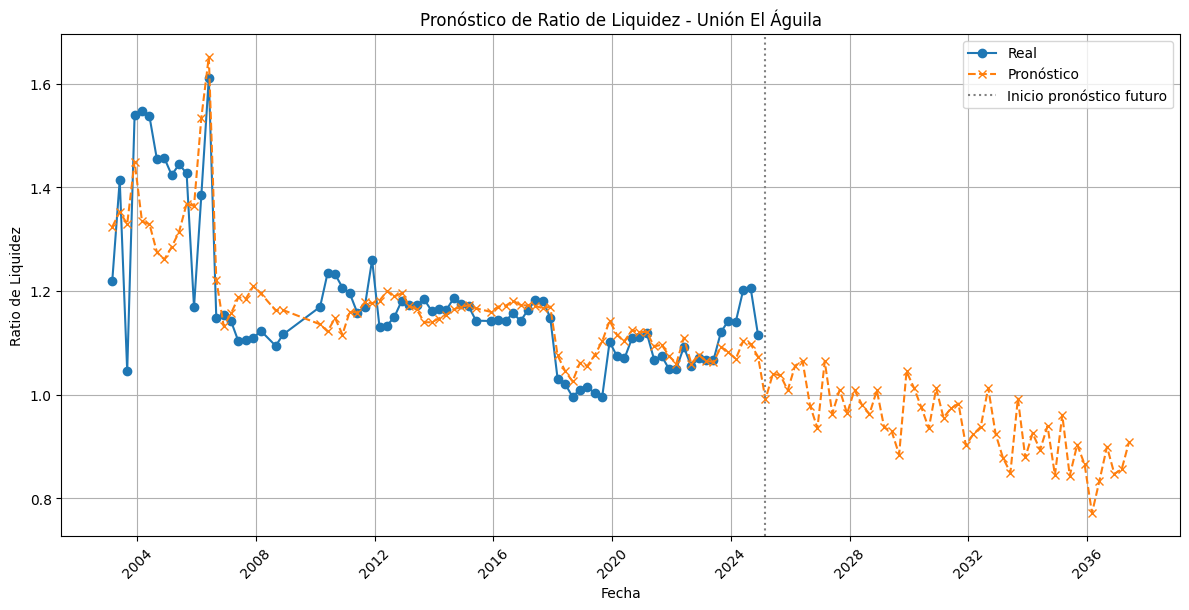

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/zmq/eventloop/zmqstream.py", line 557, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/iostream.py", line 120, in _handle_event
    event_f()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/iostream.py", line 518, in _flush
    self.session.send(
  File "/usr/local/lib/python3.11/dist-packages/jupyter_client/session.py", line 742, in send
    to_send = self.serialize(msg, ident)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/jupyter_client/session.py", line 630, in serialize
    content = self.pack(content)
              ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/jupyter_client/session.py", line 82, in <lambda>
    json_packer = lambda obj: jsonapi.dumps(obj, default=date_default,
                              ^

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Leer archivo de El √Åguila y pronosticar valores actuales
# -------------------------------------
df_aguila = pd.read_excel("El √Åguila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['Uni√≥n de Credito', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
modelo = sm.OLS(df_aguila['RATIO_LIQUIDEZ'], X_aguila).fit()
coeficientes = modelo.params
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

# Generar 50 periodos adicionales con m√°s realismo
# ----------------------------
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

def periodo_to_fecha(periodo):
    a√±o = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    return pd.Timestamp(f"{a√±o}-{mes:02d}-01")

def avanzar_trimestre(periodo):
    a√±o = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    mes += 3
    if mes > 12:
        mes -= 12
        a√±o += 1
    return a√±o * 100 + mes

ultimo_periodo = int(df_aguila['PERIODO'].max())
nuevos_periodos = [avanzar_trimestre(ultimo_periodo)]
for _ in range(49):
    nuevos_periodos.append(avanzar_trimestre(nuevos_periodos[-1]))

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'Uni√≥n de Credito': 'EL √ÅGUILA', 'PERIODO': p}
    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(i + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)
        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido
    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# Unir, convertir a fechas y exportar resultados
# ----------------------------
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')
df_aguila_extendido['PERIODO_FECHA'] = df_aguila_extendido['PERIODO'].apply(periodo_to_fecha)
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# Graficar con fechas reales
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['PRONOSTICO'], label='Pron√≥stico', linestyle='--', marker='x')
fecha_inicio_futuro = periodo_to_fecha(avanzar_trimestre(ultimo_periodo))
plt.axvline(fecha_inicio_futuro, color='gray', linestyle=':', label='Inicio pron√≥stico futuro')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Liquidez')
plt.title('Pron√≥stico de Ratio de Liquidez - Uni√≥n El √Åguila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Evaluaci√≥n del modelo
real = df_aguila['RATIO_LIQUIDEZ']
pred = df_aguila['PRONOSTICO']
mse = mean_squared_error(real, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real, pred)

print("\n=== ERRORES DEL PRON√ìSTICO (datos reales de El √Åguila) ===")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"MSE  (Error Cuadr√°tico Medio): {mse:.4f}")
print(f"RMSE (Ra√≠z del Error Cuadr√°tico Medio): {rmse:.4f}")

# Clasificaci√≥n tipo sem√°foro con rangos definidos por la imagen
print("\n\ud83d\udcc8 Clasificaci√≥n tipo sem√°foro basada en promedios de pron√≥stico futuro (seg√∫n tabla de colores)")

# Calcular promedio de los pr√≥ximos 50 trimestres
promedios_futuros = df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA', 'PRONOSTICO']].mean().round(4)
promedios_futuros.rename({'PRONOSTICO': 'RATIO DE LIQUIDEZ'}, inplace=True)

def clasificar_color(indicador, valor):
    if indicador == 'ROA':
        if valor <= -0.0080:
            return 'üî¥ Alto'
        elif valor <= 0.0077:
            return 'üü° Medio'
        else:
            return 'üü¢ Bajo'
    elif indicador == 'ROE':
        if valor <= -0.0156:
            return 'üî¥ Alto'
        elif valor <= 0.0561:
            return 'üü° Medio'
        else:
            return 'üü¢ Bajo'
    elif indicador == 'IMOR':
        if valor <= 0.0104:
            return 'üî¥ Alto'
        elif valor <= 0.0114:
            return 'üü° Medio'
        else:
            return 'üü¢ Bajo'
    elif indicador == 'ICOR':
        if valor > 0.0465:
            return 'üî¥ Alto'
        elif valor > 0.0163:
            return 'üü° Medio'
        else:
            return 'üü¢ Bajo'
    elif indicador == 'RATIO DE LIQUIDEZ':
        if valor > 0.5573:
            return 'üî¥ Alto'
        elif valor > 0.2845:
            return 'üü° Medio'
        else:
            return 'üü¢ Bajo'
    else:
        return 'Sin clasificar'

print("\nüîπ Uni√≥n de Cr√©dito: EL √ÅGUILA (promedio de pron√≥stico futuro)")
for indicador in ['ROA', 'ROE', 'IMOR', 'ICOR', 'RATIO DE LIQUIDEZ']:
    valor = promedios_futuros[indicador]
    estado = clasificar_color(indicador, valor)
    porcentaje = f"{valor*100:.2f}%"
    print(f"{indicador}: {porcentaje} ‚Üí {estado}")


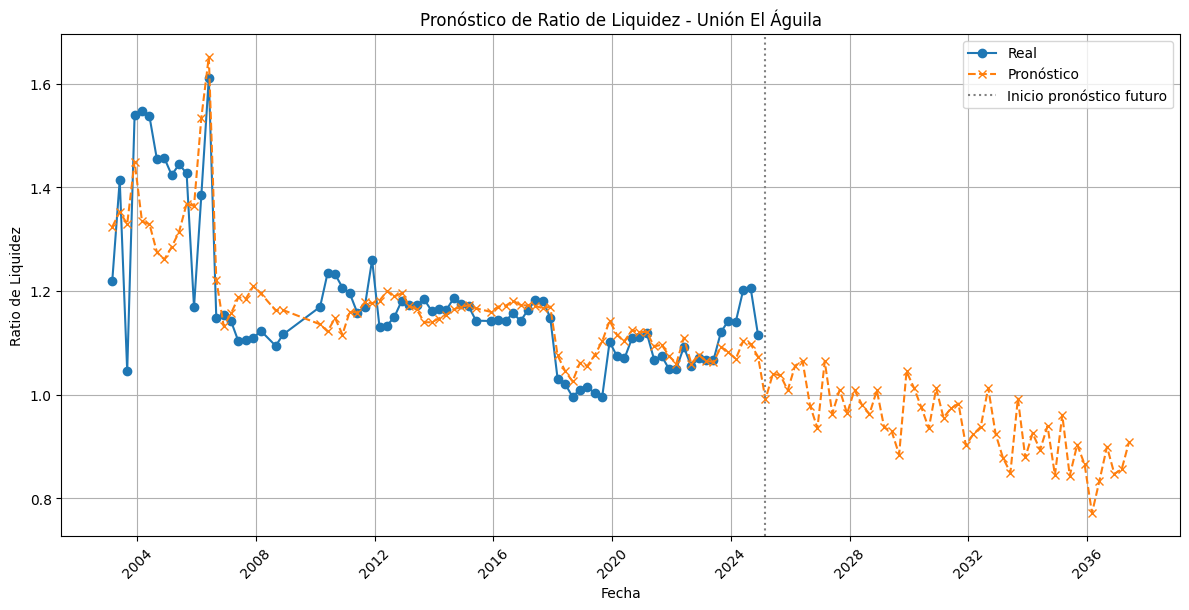


=== ERRORES DEL PRON√ìSTICO (datos reales de El √Åguila) ===
MAE  (Error Absoluto Medio): 0.0562
MSE  (Error Cuadr√°tico Medio): 0.0064
RMSE (Ra√≠z del Error Cuadr√°tico Medio): 0.0800

Clasificaci√≥n tipo sem√°foro basada en promedios de pron√≥stico futuro

Uni√≥n de Cr√©dito: EL √ÅGUILA (promedio de pron√≥stico futuro)
ROA: 817.78% ‚Üí BAJO
ROE: 2010.65% ‚Üí BAJO
IMOR: 1356.22% ‚Üí BAJO
ICOR: 6650.67% ‚Üí ALTO
RATIO DE LIQUIDEZ: 94.63% ‚Üí ALTO


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Leer archivo de El √Åguila y pronosticar valores actuales
df_aguila = pd.read_excel("El √Åguila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['Uni√≥n de Credito', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
modelo = sm.OLS(df_aguila['RATIO_LIQUIDEZ'], X_aguila).fit()
coeficientes = modelo.params
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

# Generar 50 periodos adicionales con m√°s realismo
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

def periodo_to_fecha(periodo):
    a√±o = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    return pd.Timestamp(f"{a√±o}-{mes:02d}-01")

def avanzar_trimestre(periodo):
    a√±o = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    mes += 3
    if mes > 12:
        mes -= 12
        a√±o += 1
    return a√±o * 100 + mes

ultimo_periodo = int(df_aguila['PERIODO'].max())
nuevos_periodos = [avanzar_trimestre(ultimo_periodo)]
for _ in range(49):
    nuevos_periodos.append(avanzar_trimestre(nuevos_periodos[-1]))

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'Uni√≥n de Credito': 'EL √ÅGUILA', 'PERIODO': p}
    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(i + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)
        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido
    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# Unir, convertir a fechas y exportar resultados
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')
df_aguila_extendido['PERIODO_FECHA'] = df_aguila_extendido['PERIODO'].apply(periodo_to_fecha)
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# Graficar con fechas reales
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['PRONOSTICO'], label='Pron√≥stico', linestyle='--', marker='x')
fecha_inicio_futuro = periodo_to_fecha(avanzar_trimestre(ultimo_periodo))
plt.axvline(fecha_inicio_futuro, color='gray', linestyle=':', label='Inicio pron√≥stico futuro')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Liquidez')
plt.title('Pron√≥stico de Ratio de Liquidez - Uni√≥n El √Åguila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Evaluaci√≥n del modelo
real = df_aguila['RATIO_LIQUIDEZ']
pred = df_aguila['PRONOSTICO']
mse = mean_squared_error(real, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real, pred)

print("\n=== ERRORES DEL PRON√ìSTICO (datos reales de El √Åguila) ===")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"MSE  (Error Cuadr√°tico Medio): {mse:.4f}")
print(f"RMSE (Ra√≠z del Error Cuadr√°tico Medio): {rmse:.4f}")

# Clasificaci√≥n tipo sem√°foro con rangos definidos por la imagen (sin emojis)
print("\nClasificaci√≥n tipo sem√°foro basada en promedios de pron√≥stico futuro")

# Calcular promedio de los pr√≥ximos 50 trimestres
promedios_futuros = df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA', 'PRONOSTICO']].mean().round(4)
promedios_futuros = promedios_futuros.rename({'PRONOSTICO': 'RATIO DE LIQUIDEZ'})

def clasificar_color(indicador, valor):
    if indicador == 'ROA':
        if valor <= -0.0080:
            return 'ALTO'
        elif valor <= 0.0077:
            return 'MEDIO'
        else:
            return 'BAJO'
    elif indicador == 'ROE':
        if valor <= -0.0156:
            return 'ALTO'
        elif valor <= 0.0561:
            return 'MEDIO'
        else:
            return 'BAJO'
    elif indicador == 'IMOR':
        if valor <= 0.0104:
            return 'ALTO'
        elif valor <= 0.0114:
            return 'MEDIO'
        else:
            return 'BAJO'
    elif indicador == 'ICOR':
        if valor > 0.0465:
            return 'ALTO'
        elif valor > 0.0163:
            return 'MEDIO'
        else:
            return 'BAJO'
    elif indicador == 'RATIO DE LIQUIDEZ':
        if valor > 0.5573:
            return 'ALTO'
        elif valor > 0.2845:
            return 'MEDIO'
        else:
            return 'BAJO'
    else:
        return 'Sin clasificar'

print("\nUni√≥n de Cr√©dito: EL √ÅGUILA (promedio de pron√≥stico futuro)")
for indicador in ['ROA', 'ROE', 'IMOR', 'ICOR', 'RATIO DE LIQUIDEZ']:
    valor = promedios_futuros[indicador]
    porcentaje = f"{valor * 100:.2f}%"
    clasificacion = clasificar_color(indicador, valor)
    print(f"{indicador}: {porcentaje} ‚Üí {clasificacion}")


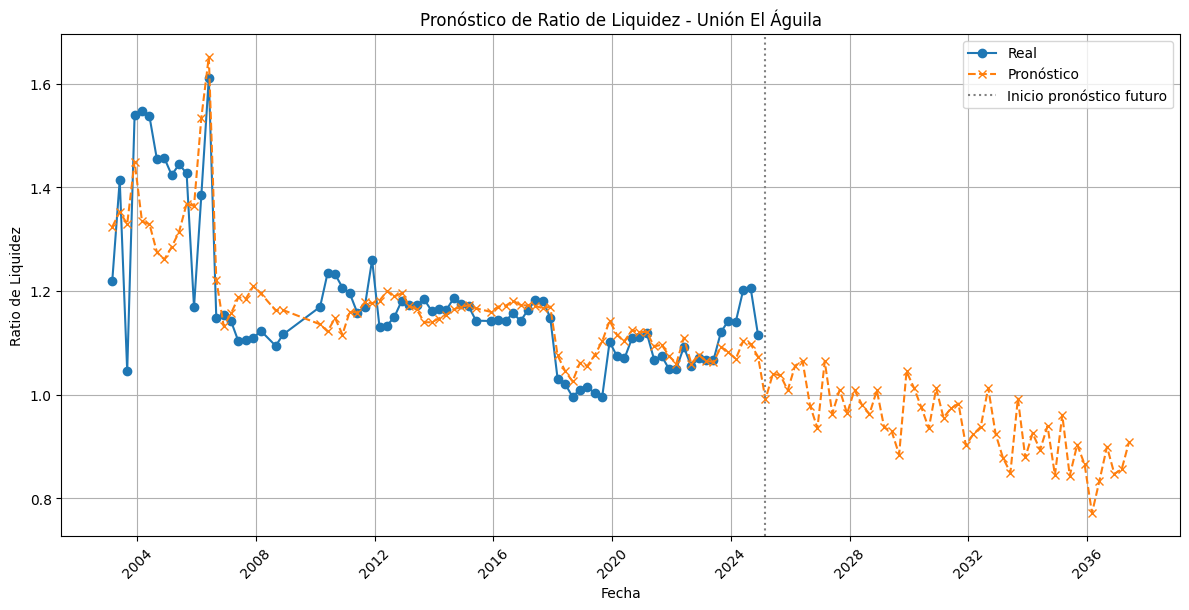


=== ERRORES DEL PRON√ìSTICO (datos reales de El √Åguila) ===
MAE  (Error Absoluto Medio): 0.0562
MSE  (Error Cuadr√°tico Medio): 0.0064
RMSE (Ra√≠z del Error Cuadr√°tico Medio): 0.0800


In [ ]:
#  Leer archivo de El √Åguila y pronosticar valores actuales
# -------------------------------------
df_aguila = pd.read_excel("El √Åguila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

#----------------------------
# Generar 50 periodos adicionales con m√°s realismo
# ----------------------------
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

# Traducir PERIODO a fechas trimestrales
def periodo_to_fecha(periodo):
    a√±o = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    return pd.Timestamp(f"{a√±o}-{mes:02d}-01")

def avanzar_trimestre(periodo):
    a√±o = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    mes += 3
    if mes > 12:
        mes -= 12
        a√±o += 1
    return a√±o * 100 + mes

ultimo_periodo = int(df_aguila['PERIODO'].max())
nuevos_periodos = [avanzar_trimestre(ultimo_periodo)]
for _ in range(49):
    nuevos_periodos.append(avanzar_trimestre(nuevos_periodos[-1]))

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'UNIONES': 'EL √ÅGUILA', 'PERIODO': p}

    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(i + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)
        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido

    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# ----------------------------
# Unir, convertir a fechas y exportar resultados
# ----------------------------
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')
df_aguila_extendido['PERIODO_FECHA'] = df_aguila_extendido['PERIODO'].apply(periodo_to_fecha)

# Exportar a Excel
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# ----------------------------
# Graficar con fechas reales
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['PRONOSTICO'], label='Pron√≥stico', linestyle='--', marker='x')
fecha_inicio_futuro = periodo_to_fecha(avanzar_trimestre(ultimo_periodo))
plt.axvline(fecha_inicio_futuro, color='gray', linestyle=':', label='Inicio pron√≥stico futuro')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Liquidez')
plt.title('Pron√≥stico de Ratio de Liquidez - Uni√≥n El √Åguila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# Evaluaci√≥n del modelo
# ----------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error

real = df_aguila['RATIO_LIQUIDEZ']
pred = df_aguila['PRONOSTICO']
mse = mean_squared_error(real, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real, pred)

print("\n=== ERRORES DEL PRON√ìSTICO (datos reales de El √Åguila) ===")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"MSE  (Error Cuadr√°tico Medio): {mse:.4f}")
print(f"RMSE (Ra√≠z del Error Cuadr√°tico Medio): {rmse:.4f}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
from datetime import datetime
import matplotlib.dates as mdates

In [ ]:
# 1. Cargar y ajustar modelo panel
# ----------------------------
df = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df = df[df['PERIODO'] != 'PERIODO']
df['PERIODO'] = pd.to_numeric(df['PERIODO'])
df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

df_panel = df.set_index(['UNIONES', 'PERIODO'])
Y = df_panel['RATIO_LIQUIDEZ']
X = sm.add_constant(df_panel[['IMOR', 'ICOR', 'ROE', 'ROA']])
modelo = PanelOLS(Y, X, entity_effects=True)
resultados = modelo.fit()
coeficientes = resultados.params

print("\n=== RESUMEN DEL MODELO ===\n")
print(resultados.summary)


=== RESUMEN DEL MODELO ===

                          PanelOLS Estimation Summary                           
Dep. Variable:         RATIO_LIQUIDEZ   R-squared:                        0.0756
Estimator:                   PanelOLS   R-squared (Between):              0.1350
No. Observations:                1148   R-squared (Within):               0.0756
Date:                Sat, Jun 07 2025   R-squared (Overall):              0.1086
Time:                        19:23:10   Log-likelihood                   -118.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      23.110
Entities:                          14   P-value                           0.0000
Avg Obs:                       82.000   Distribution:                  F(4,1130)
Min Obs:                       82.000                                           
Max Obs:                       82.000   F-statistic (robust):             23.110

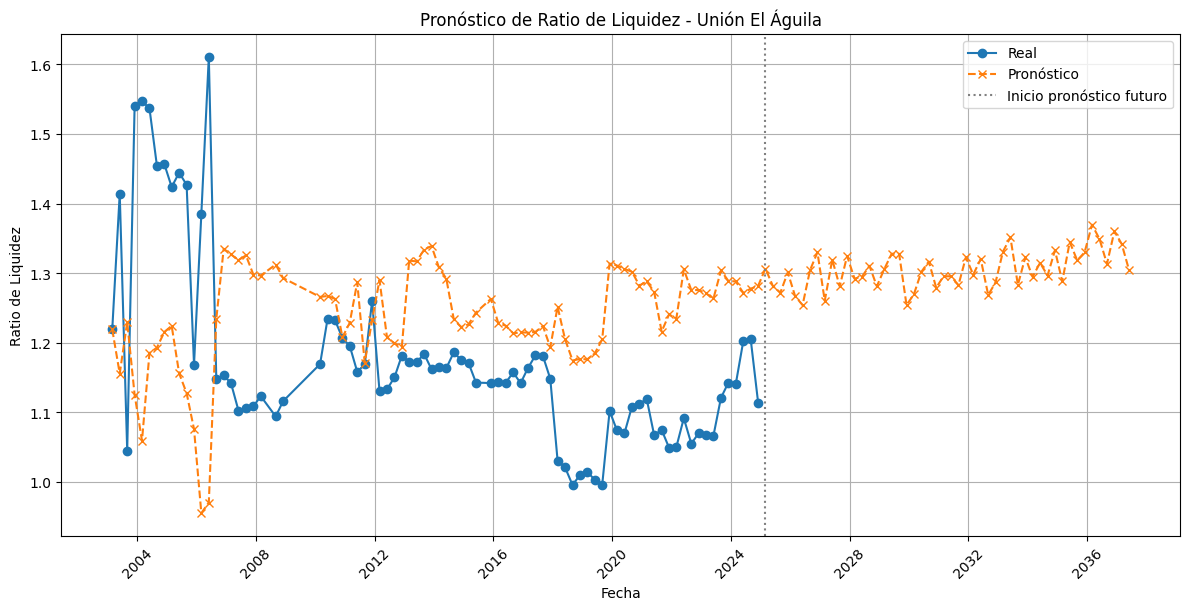


=== ERRORES DEL PRON√ìSTICO (datos reales de El √Åguila) ===
MAE  (Error Absoluto Medio): 0.1615
MSE  (Error Cuadr√°tico Medio): 0.0379
RMSE (Ra√≠z del Error Cuadr√°tico Medio): 0.1948


In [ ]:
#  Leer archivo de El √Åguila y pronosticar valores actuales
# -------------------------------------
df_aguila = pd.read_excel("El √Åguila Prueba.xlsx", sheet_name="Hoja1")
df_aguila.columns = ['UNIONES', 'PERIODO', 'RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']
df_aguila = df_aguila[df_aguila['PERIODO'] != 'PERIODO']
df_aguila['PERIODO'] = pd.to_numeric(df_aguila['PERIODO'])
df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']] = df_aguila[['RATIO_LIQUIDEZ', 'IMOR', 'ICOR', 'ROA', 'ROE']].apply(pd.to_numeric)

X_aguila = sm.add_constant(df_aguila[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_aguila['PRONOSTICO'] = X_aguila.dot(coeficientes)
df_aguila['ERROR'] = df_aguila['RATIO_LIQUIDEZ'] - df_aguila['PRONOSTICO']

#----------------------------
# Generar 50 periodos adicionales con m√°s realismo
# ----------------------------
variables = ['IMOR', 'ICOR', 'ROE', 'ROA']
tendencias = {}
for var in variables:
    pendiente, inter = np.polyfit(df_aguila['PERIODO'], df_aguila[var], 1)
    tendencias[var] = (pendiente, inter)

# Traducir PERIODO a fechas trimestrales
def periodo_to_fecha(periodo):
    a√±o = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    return pd.Timestamp(f"{a√±o}-{mes:02d}-01")

def avanzar_trimestre(periodo):
    a√±o = int(str(periodo)[:4])
    mes = int(str(periodo)[4:])
    mes += 3
    if mes > 12:
        mes -= 12
        a√±o += 1
    return a√±o * 100 + mes

ultimo_periodo = int(df_aguila['PERIODO'].max())
nuevos_periodos = [avanzar_trimestre(ultimo_periodo)]
for _ in range(49):
    nuevos_periodos.append(avanzar_trimestre(nuevos_periodos[-1]))

np.random.seed(42)
nuevos_datos = []

for i, p in enumerate(nuevos_periodos):
    fila = {'UNIONES': 'EL √ÅGUILA', 'PERIODO': p}

    for var in variables:
        pendiente, inter = tendencias[var]
        base_lineal = pendiente * p + inter
        efecto_log = 0.015 * np.log(i + 1)
        estacionalidad = 0.02 * np.sin(i / 3 * np.pi)
        std_hist = df_aguila[var].std()
        ruido = np.random.normal(0, 0.15 * std_hist)
        fila[var] = base_lineal * (1 + efecto_log + estacionalidad) + ruido

    fila['RATIO_LIQUIDEZ'] = np.nan
    nuevos_datos.append(fila)

df_futuro = pd.DataFrame(nuevos_datos)
X_futuro = sm.add_constant(df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA']])
df_futuro['PRONOSTICO'] = X_futuro.dot(coeficientes)
df_futuro['ERROR'] = np.nan

# ----------------------------
# Unir, convertir a fechas y exportar resultados
# ----------------------------
df_aguila_extendido = pd.concat([df_aguila, df_futuro], ignore_index=True).sort_values('PERIODO')
df_aguila_extendido['PERIODO_FECHA'] = df_aguila_extendido['PERIODO'].apply(periodo_to_fecha)

# Exportar a Excel
df_aguila_extendido.to_excel("Pronostico_El_Aguila.xlsx", index=False)

# ----------------------------
# Graficar con fechas reales
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['RATIO_LIQUIDEZ'], label='Real', marker='o')
plt.plot(df_aguila_extendido['PERIODO_FECHA'], df_aguila_extendido['PRONOSTICO'], label='Pron√≥stico', linestyle='--', marker='x')
fecha_inicio_futuro = periodo_to_fecha(avanzar_trimestre(ultimo_periodo))
plt.axvline(fecha_inicio_futuro, color='gray', linestyle=':', label='Inicio pron√≥stico futuro')
plt.xlabel('Fecha')
plt.ylabel('Ratio de Liquidez')
plt.title('Pron√≥stico de Ratio de Liquidez - Uni√≥n El √Åguila')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# Evaluaci√≥n del modelo
# ----------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error

real = df_aguila['RATIO_LIQUIDEZ']
pred = df_aguila['PRONOSTICO']
mse = mean_squared_error(real, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real, pred)

print("\n=== ERRORES DEL PRON√ìSTICO (datos reales de El √Åguila) ===")
print(f"MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"MSE  (Error Cuadr√°tico Medio): {mse:.4f}")
print(f"RMSE (Ra√≠z del Error Cuadr√°tico Medio): {rmse:.4f}")

In [ ]:
# Clasificaci√≥n tipo sem√°foro usando promedios de pron√≥stico futuro
print("\nüìà Clasificaci√≥n tipo sem√°foro basada en promedios de pron√≥stico futuro")

# Cargar archivo de panel para cuartiles
df_panel = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df_panel.columns = df_panel.iloc[0]
df_panel = df_panel[1:]
df_panel.columns.name = None
df_panel = df_panel.rename(columns={"Uni√≥n de Credito": "INDICADOR"})

numeric_cols = ["RATIO DE LIQUIDEZ", "IMOR", "ICOR", "ROA", "ROE"]
for col in numeric_cols:
    df_panel[col] = pd.to_numeric(df_panel[col], errors='coerce')

cuartiles = df_panel[numeric_cols].quantile([0.25, 0.5, 0.75]).round(2)
indicadores_invertidos = ["IMOR", "ICOR"]

def clasificar(valor, q1, q3, invertido=False):
    if invertido:
        if valor > q3:
            return "üî¥ Alto"
        elif valor < q1:
            return "üü¢ Bajo"
        else:
            return "üü° Medio"
    else:
        if valor < q1:
            return "üî¥ Alto"
        elif valor > q3:
            return "üü¢ Bajo"
        else:
            return "üü° Medio"


# Calcular promedio de los pr√≥ximos 50 trimestres
promedios_futuros = df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA', 'PRONOSTICO']].mean().round(2)
promedios_futuros.rename({'PRONOSTICO': 'RATIO DE LIQUIDEZ'}, inplace=True)

print("\nüîπ Uni√≥n de Cr√©dito: EL √ÅGUILA (promedio de pron√≥stico futuro)")
for col in numeric_cols:
    valor = promedios_futuros[col]
    invertido = col in indicadores_invertidos
    estado = clasificar(valor, cuartiles.loc[0.25, col], cuartiles.loc[0.75, col], invertido)
    print(f"{col}: {valor} ‚Üí {estado}")


üìà Clasificaci√≥n tipo sem√°foro basada en promedios de pron√≥stico futuro

üîπ Uni√≥n de Cr√©dito: EL √ÅGUILA (promedio de pron√≥stico futuro)
RATIO DE LIQUIDEZ: 1.31 ‚Üí üü¢ Bajo
IMOR: 13.56 ‚Üí üü° Medio
ICOR: 66.51 ‚Üí üü° Medio
ROA: 8.18 ‚Üí üü¢ Bajo
ROE: 20.11 ‚Üí üü¢ Bajo


In [ ]:
# Calcular los promedios futuros de los indicadores pronosticados
promedios = {
    'PRONOSTICO_': df['PRONOSTICO'].mean(),
    'IMOR': df['IMOR'].mean(),
    'ICOR': df['ICOR'].mean(),
    'ROA': df['ROA'].mean(),
    'ROE': df['ROE'].mean()
}

# Clasificar cada promedio con las funciones previamente definidas
clasificacion = {
    'PRONOSTICO': clasificar_liquidez(promedios['PRONOSTICO']),
    'IMOR': clasificar_imor(promedios['IMOR']),
    'ICOR': clasificar_icor(promedios['ICOR']),
    'ROA': clasificar_roa(promedios['ROA']),
    'ROE': clasificar_roe(promedios['ROE'])
}

# Asociar √≠conos seg√∫n la clasificaci√≥n
iconos = {'Alto': 'üî¥ Alto', 'Medio': 'üü° Medio', 'Bajo': 'üü¢ Bajo'}

# Construir el texto final
reporte = f"""üìà Clasificaci√≥n tipo sem√°foro basada en promedios de pron√≥stico futuro

üîπ Uni√≥n de Cr√©dito: EL √ÅGUILA (promedio de pron√≥stico futuro)
RATIO DE LIQUIDEZ: {promedios['PRONOSTICO']:.2f} ‚Üí {iconos[clasificacion['PRONOSTICO']]}
IMOR: {promedios['IMOR']:.2f} ‚Üí {iconos[clasificacion['IMOR']]}
ICOR: {promedios['ICOR']:.2f} ‚Üí {iconos[clasificacion['ICOR']]}
ROA: {promedios['ROA']:.2f} ‚Üí {iconos[clasificacion['ROA']]}
ROE: {promedios['ROE']:.2f} ‚Üí {iconos[clasificacion['ROE']]}
"""

reporte


KeyError: 'PRONOSTICO'

In [ ]:
import pandas as pd

# Cargar archivo del panel (no se usa para cuartiles ahora, pero puede mantenerse si lo necesitas para otras cosas)
df_panel = pd.read_excel("PANEL BIEN.xlsx", sheet_name="Hoja1")
df_panel.columns = df_panel.iloc[0]
df_panel = df_panel[1:]
df_panel.columns.name = None
df_panel = df_panel.rename(columns={"Uni√≥n de Credito": "INDICADOR"})

# Asegurar que las columnas num√©ricas sean num√©ricas
numeric_cols = ["RATIO DE LIQUIDEZ", "IMOR", "ICOR", "ROA", "ROE"]
for col in numeric_cols:
    df_panel[col] = pd.to_numeric(df_panel[col], errors='coerce')

# Suponiendo que df_futuro ya est√° cargado como tu archivo de pron√≥stico (como en pasos anteriores)

# Calcular promedios de los pr√≥ximos 50 trimestres
promedios_futuros = df_futuro[['IMOR', 'ICOR', 'ROE', 'ROA', 'PRONOSTICO']].mean().round(2)
promedios_futuros.rename({'PRONOSTICO': 'RATIO DE LIQUIDEZ'}, inplace=True)

# Funciones de clasificaci√≥n por rangos espec√≠ficos de la imagen
def clasificar_roa(a):
    if a <= -0.0080:
        return 'üî¥ Alto'
    elif -0.0080 < a <= 0.0077:
        return 'üü° Medio'
    else:
        return 'üü¢ Bajo'

def clasificar_roe(b):
    if b <= -0.0156:
        return 'üî¥ Alto'
    elif -0.0156 < b <= 0.0561:
        return 'üü° Medio'
    else:
        return 'üü¢ Bajo'

def clasificar_liquidez(c):
    if c <= 1.04:
        return 'üî¥ Alto'
    elif 1.04 < c <= 1.14:
        return 'üü° Medio'
    else:
        return 'üü¢ Bajo'

def clasificar_imor(d):
    if d > 4.65:
        return 'üî¥ Alto'
    elif 1.63 < d <= 4.65:
        return 'üü° Medio'
    else:
        return 'üü¢ Bajo'

def clasificar_icor(e):
    if e > 55.73:
        return 'üî¥ Alto'
    elif 28.45 < e <= 55.73:
        return 'üü° Medio'
    else:
        return 'üü¢ Bajo'

# Imprimir clasificaci√≥n tipo sem√°foro
print("\nüìà Clasificaci√≥n tipo sem√°foro basada en promedios de pron√≥stico futuro")
print("\nüîπ Uni√≥n de Cr√©dito: EL √ÅGUILA (promedio de pron√≥stico futuro)")

print(f"RATIO DE LIQUIDEZ: {promedios_futuros['RATIO DE LIQUIDEZ']} ‚Üí {clasificar_liquidez(promedios_futuros['RATIO DE LIQUIDEZ'])}")
print(f"IMOR: {promedios_futuros['IMOR']} ‚Üí {clasificar_imor(promedios_futuros['IMOR'])}")
print(f"ICOR: {promedios_futuros['ICOR']} ‚Üí {clasificar_icor(promedios_futuros['ICOR'])}")
print(f"ROA: {promedios_futuros['ROA']} ‚Üí {clasificar_roa(promedios_futuros['ROA'])}")
print(f"ROE: {promedios_futuros['ROE']} ‚Üí {clasificar_roe(promedios_futuros['ROE'])}")



üìà Clasificaci√≥n tipo sem√°foro basada en promedios de pron√≥stico futuro

üîπ Uni√≥n de Cr√©dito: EL √ÅGUILA (promedio de pron√≥stico futuro)
RATIO DE LIQUIDEZ: 1.31 ‚Üí üü¢ Bajo
IMOR: 13.56 ‚Üí üî¥ Alto
ICOR: 66.51 ‚Üí üî¥ Alto
ROA: 8.18 ‚Üí üü¢ Bajo
ROE: 20.11 ‚Üí üü¢ Bajo
